In [101]:
#Importing all required library
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [102]:
#Downloading nltk StopWords and Wordnet 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset1
1.importing 1st dataset
2.EDA on 1st dataset
3.Data pre-processing

In [104]:
Dataset1 = pd.read_csv("/content/sample_data/news.csv")

In [105]:
Dataset1.head()

Unnamed: 0  ... label
0        8476  ...  FAKE
1       10294  ...  FAKE
2        3608  ...  REAL
3       10142  ...  FAKE
4         875  ...  REAL

[5 rows x 4 columns]

In [106]:
Dataset1.tail()

Unnamed: 0  ... label
6330        4490  ...  REAL
6331        8062  ...  FAKE
6332        8622  ...  FAKE
6333        4021  ...  REAL
6334        4330  ...  REAL

[5 rows x 4 columns]

In [107]:
Dataset1.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [108]:
Dataset1["Article"] = Dataset1["title"] + Dataset1["text"]
Dataset1.sample(frac = 1) #Shuffle 100%

Dataset1.label[Dataset1.label == 'REAL'] = 1
Dataset1.label[Dataset1.label == 'FAKE'] = 0

Dataset1 = Dataset1.loc[:,['Article','label']]
Dataset1 = Dataset1.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In this step we will clean the data that will be used for training. The cleaning will involve these steps-
1.Removing all the extra information like brackets, any kind of puctuations - commas, apostrophes, quotes, question marks, and more.
2.Remove all the numeric text, urls

In [109]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [110]:
##  Applying the wordpre method to the dataset
Dataset1['Article']=Dataset1['Article'].apply(wordpre)

In [111]:
Dataset1.head()

Article label
0  you can smell hillary s feardaniel greenfield ...     0
1  watch the exact moment paul ryan committed pol...     0
2  kerry to go to paris in gesture of sympathyu s...     1
3  bernie supporters on twitter erupt in anger ag...     0
4  the battle of new york  why this primary matte...     1

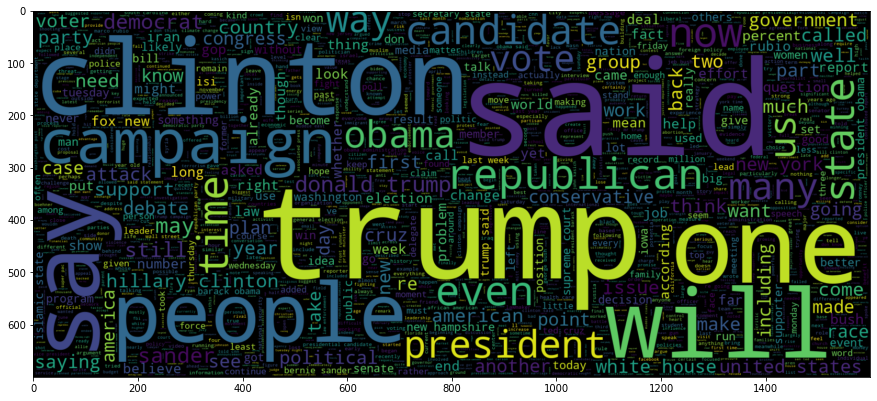

In [112]:
#word used in Real news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

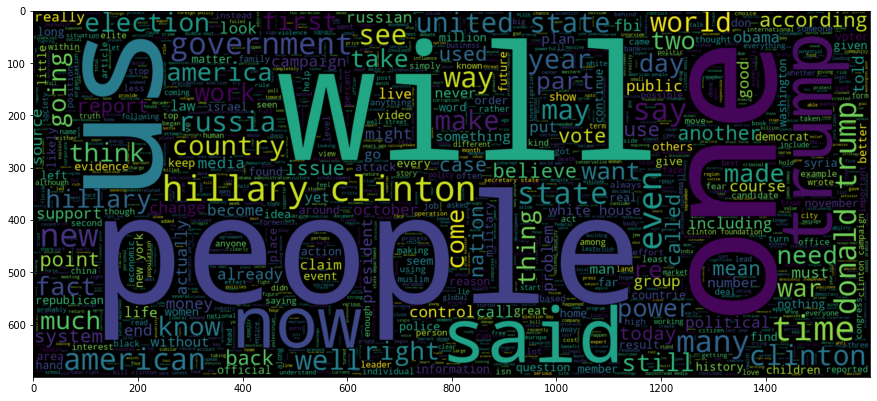

In [113]:
#word used in Fake news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset2

In [114]:
Dataset2_true = pd.read_csv("/content/sample_data/True.csv")
Dataset2_fake = pd.read_csv("/content/sample_data/Fake.csv")

In [115]:
Dataset2_fake.head()

title  ...               date
0   Donald Trump Sends Out Embarrassing New Year’...  ...  December 31, 2017
1   Drunk Bragging Trump Staffer Started Russian ...  ...  December 31, 2017
2   Sheriff David Clarke Becomes An Internet Joke...  ...  December 30, 2017
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  December 29, 2017
4   Pope Francis Just Called Out Donald Trump Dur...  ...  December 25, 2017

[5 rows x 4 columns]

In [116]:
Dataset2_true.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [117]:
Dataset2_fake.nunique()

title      17903
text       17455
subject        6
date        1681
dtype: int64

In [118]:
#Counting by Subjects in Real news
for key,count in Dataset2_true.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{Dataset2_true.shape[0]}")

politicsNews:	11272
worldnews:	10145
Total Records:	21417


In [119]:
#Counting by Subjects in Fake news
for key,count in Dataset2_fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{Dataset2_fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


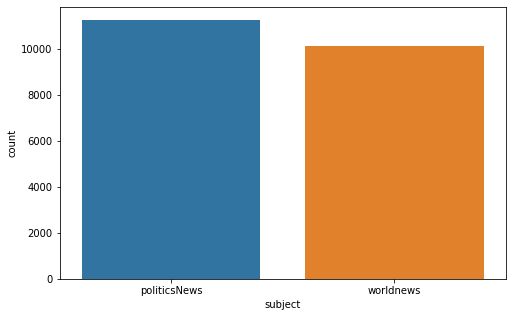

In [120]:
#ploting the Subjects in Real news
plt.figure(figsize=(8,5))
sns.countplot("subject", data=Dataset2_true)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


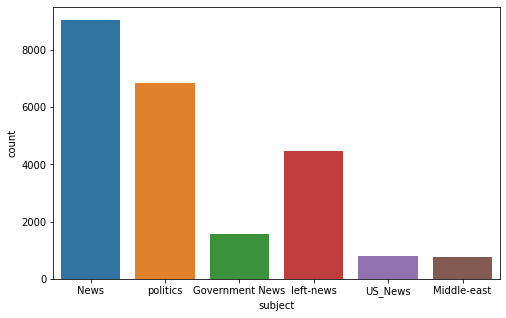

In [121]:
#ploting the Subjects in Fake news
plt.figure(figsize=(8,5))
sns.countplot("subject", data=Dataset2_fake)
plt.show()

In [122]:
Dataset2_true['label']= 1
Dataset2_fake['label']= 0
Dataset2 = pd.concat([Dataset2_true, Dataset2_fake])
Dataset2["Article"] = Dataset2["title"] + Dataset2["text"]
Dataset2.sample(frac = 1) #Shuffle 100%
Dataset2 = Dataset2.loc[:,['Article','label']]

In [123]:
Dataset2

Article  label
0      As U.S. budget fight looms, Republicans flip t...      1
1      U.S. military to accept transgender recruits o...      1
2      Senior U.S. Republican senator: 'Let Mr. Muell...      1
3      FBI Russia probe helped by Australian diplomat...      1
4      Trump wants Postal Service to charge 'much mor...      1
...                                                  ...    ...
23476  McPain: John McCain Furious That Iran Treated ...      0
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...      0
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...      0
23479  How to Blow $700 Million: Al Jazeera America F...      0
23480  10 U.S. Navy Sailors Held by Iranian Military ...      0

[44898 rows x 2 columns]

In [124]:
##  Applying the wordpre method to the dataset
Dataset2['Article']=Dataset2['Article'].apply(wordpre)

In [125]:
Dataset2.head()

Article  label
0  as u s  budget fight looms  republicans flip t...      1
1  u s  military to accept transgender recruits o...      1
2  senior u s  republican senator   let mr  muell...      1
3  fbi russia probe helped by australian diplomat...      1
4  trump wants postal service to charge  much mor...      1

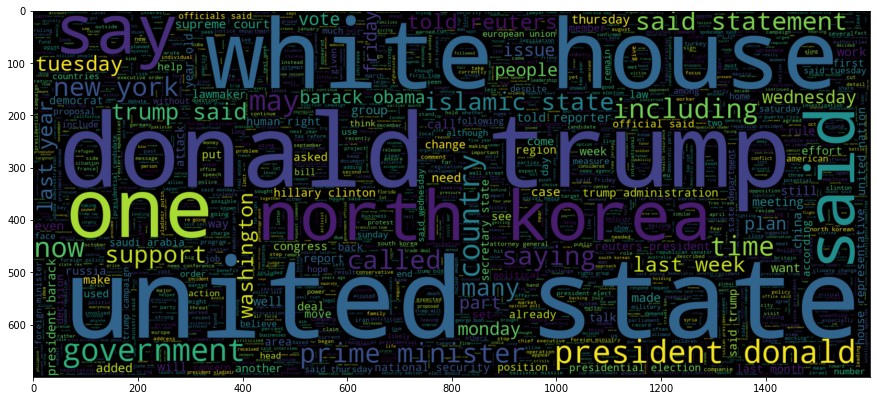

In [126]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

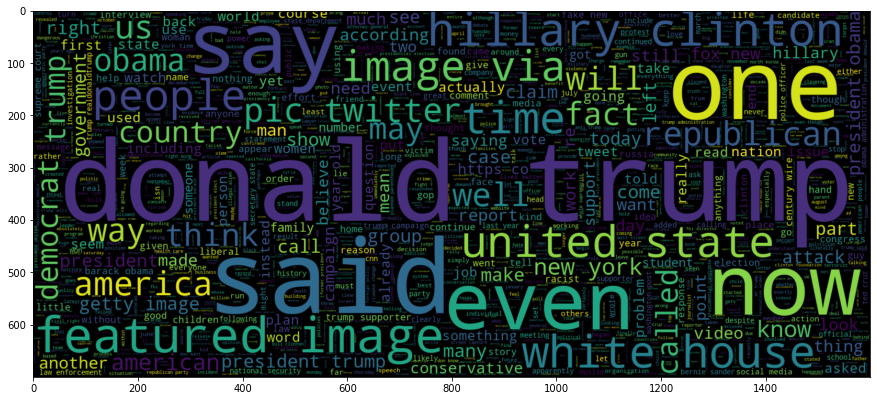

In [127]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 3

In [128]:
Dataset3_real = pd.read_csv("/content/sample_data/politifact_real.csv")
Dataset3_fake = pd.read_csv("/content/sample_data/politifact_fake.csv")

In [129]:
Dataset3_real.head()

id  ...                                          tweet_ids
0  politifact14984  ...  967132259869487105\t967164368768196609\t967215...
1  politifact12944  ...  942953459\t8980098198\t16253717352\t1668513250...
2    politifact333  ...                                                NaN
3   politifact4358  ...                                                NaN
4    politifact779  ...  89804710374154240\t91270460595109888\t96039619...

[5 rows x 4 columns]

In [130]:
Dataset3_real['label']= 1
Dataset3_fake['label']= 0
Dataset3 = pd.concat([Dataset3_real, Dataset3_fake])
Dataset3["Article"] = Dataset3["title"]
Dataset3.sample(frac = 1) #Shuffle 100%
Dataset3 = Dataset3.loc[:,['Article','label']]

In [131]:
Dataset3

Article  label
0          National Federation of Independent Business      1
1                          comments in Fayetteville NC      1
2    Romney makes pitch, hoping to close deal : Ele...      1
3    Democratic Leaders Say House Democrats Are Uni...      1
4      Budget of the United States Government, FY 2008      1
..                                                 ...    ...
427        Who is affected by the government shutdown?      0
428  Lindsey Graham Threatens To Convert To Democra...      0
429  ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...      0
430  Sarah Palin Calls To Boycott Mall Of America B...      0
431                                  Account Suspended      0

[1056 rows x 2 columns]

In [132]:
##  Applying the wordpre method to the dataset
Dataset3['Article']=Dataset3['Article'].apply(wordpre)

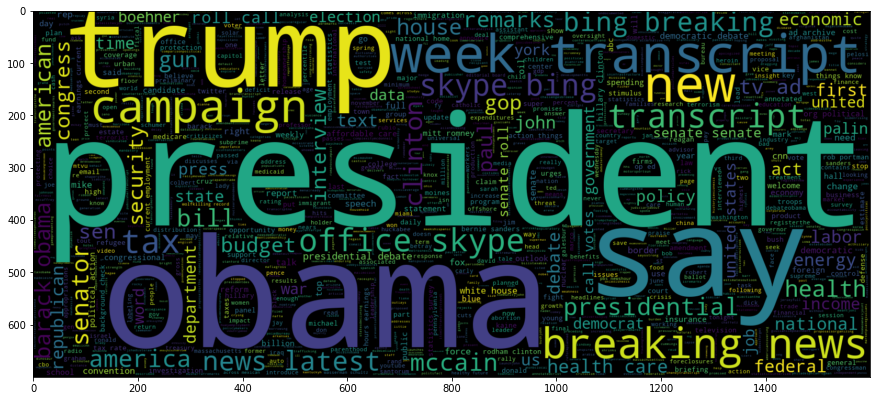

In [133]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

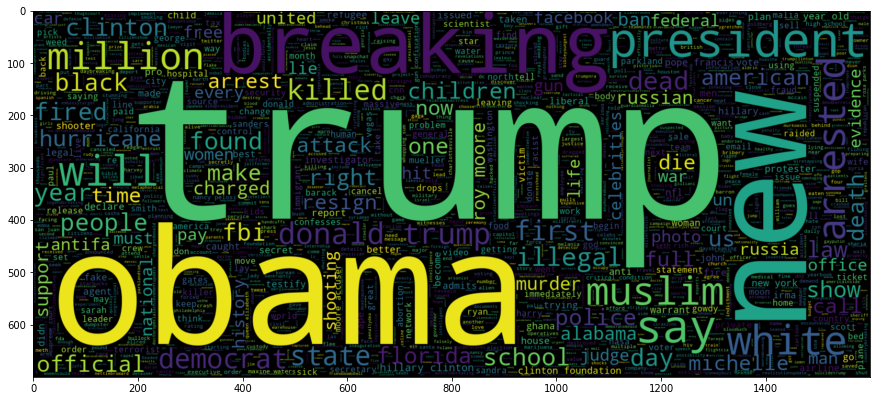

In [134]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 4

In [135]:
Dataset4 = pd.read_csv("/content/sample_data/train.csv")

In [136]:
Dataset4.head()

id  ... label
0   0  ...     1
1   1  ...     0
2   2  ...     1
3   3  ...     1
4   4  ...     1

[5 rows x 5 columns]

In [137]:
Dataset4["Article"] = Dataset4["title"] + Dataset4["text"]
Dataset4.sample(frac = 1) #Shuffle 100%

Dataset4 = Dataset4.loc[:,['Article','label']]
Dataset4 = Dataset4.dropna()

In [138]:
##  Applying the wordpre method to the dataset
Dataset4['Article']=Dataset4['Article'].apply(wordpre)

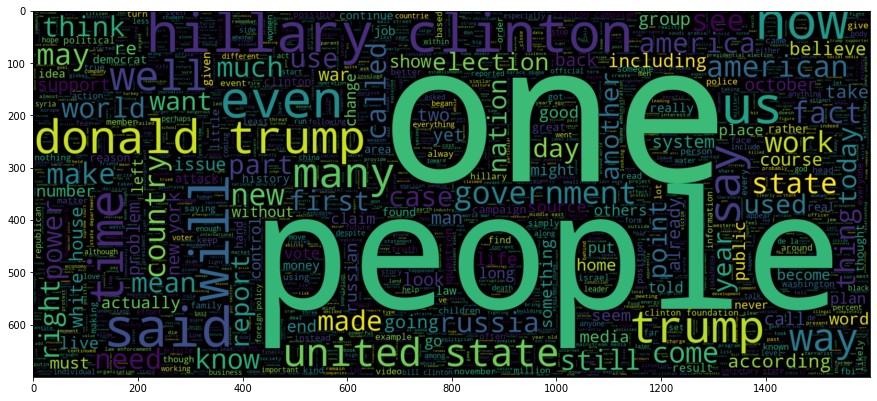

In [139]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset4[Dataset4.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

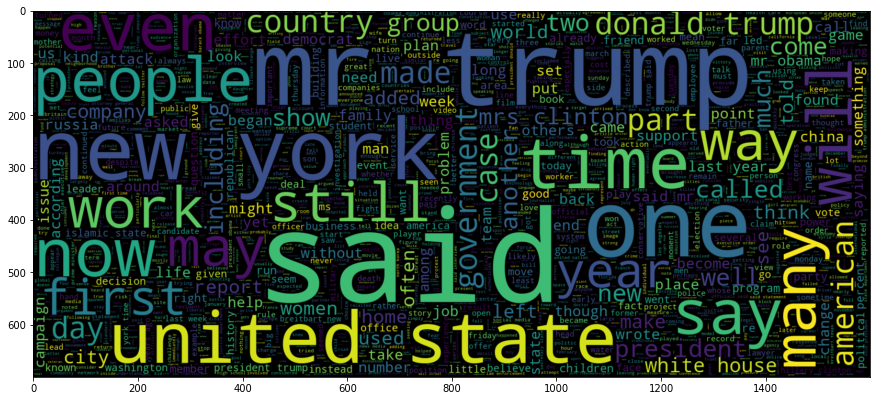

In [140]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset4[Dataset4.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 5

In [141]:
Dataset5 = pd.read_csv("/content/sample_data/data.csv")

In [142]:
Dataset5

URLs  ... Label
0     http://www.bbc.com/news/world-us-canada-414191...  ...     1
1     https://www.reuters.com/article/us-filmfestiva...  ...     1
2     https://www.nytimes.com/2017/10/09/us/politics...  ...     1
3     https://www.reuters.com/article/us-mexico-oil-...  ...     1
4     http://www.cnn.com/videos/cnnmoney/2017/10/08/...  ...     1
...                                                 ...  ...   ...
4004  http://beforeitsnews.com/sports/2017/09/trends...  ...     0
4005  http://beforeitsnews.com/u-s-politics/2017/10/...  ...     0
4006  https://www.activistpost.com/2017/09/ron-paul-...  ...     0
4007  https://www.reuters.com/article/us-china-pharm...  ...     1
4008  http://beforeitsnews.com/u-s-politics/2017/10/...  ...     0

[4009 rows x 4 columns]

In [143]:
Dataset5["Article"] = Dataset5["Headline"] + Dataset5["Body"]
Dataset5["label"] = Dataset5["Label"]
Dataset5.sample(frac = 1) #Shuffle 100%
Dataset5 = Dataset5.loc[:,['Article','label']]
Dataset5 = Dataset5.dropna()

In [144]:
##  Applying the wordpre method to the dataset
Dataset5['Article']=Dataset5['Article'].apply(wordpre)

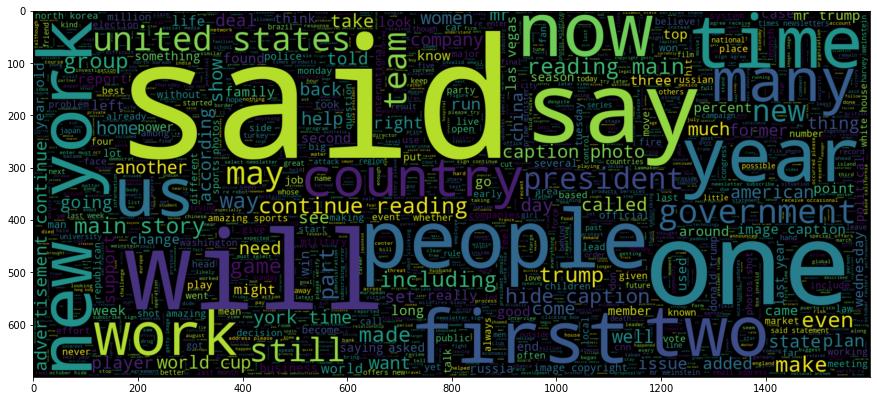

In [145]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset5[Dataset5.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

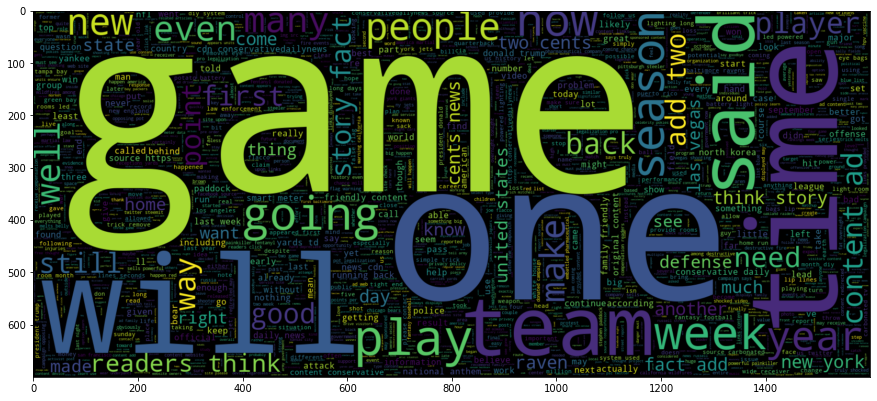

In [146]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset5[Dataset5.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

In [147]:
#combining all the datset into one
frames = [Dataset1, Dataset2, Dataset3, Dataset4,Dataset5]
Dataset = pd.concat(frames)

In [148]:
Dataset.shape

(76480, 2)

In [149]:
x_train,x_test,y_train,y_test = train_test_split(Dataset['Article'], Dataset['label'], test_size=0.2, random_state=2020)

In [150]:
x_train.shape

(61184,)

In [151]:
x_test.shape

(15296,)

In [152]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [153]:
#LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

Logisticmodel = pipe.fit(x_train, y_train)
prediction = Logisticmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Logisticmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 87.04%


# Confusion Matrix

In [154]:
prediction

array([1, 0, 0, ..., 0, 0, 0])

In [155]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [156]:
cm = confusion_matrix(y_test, prediction,labels=[0,1])

[[7081  841]
 [1141 6233]]


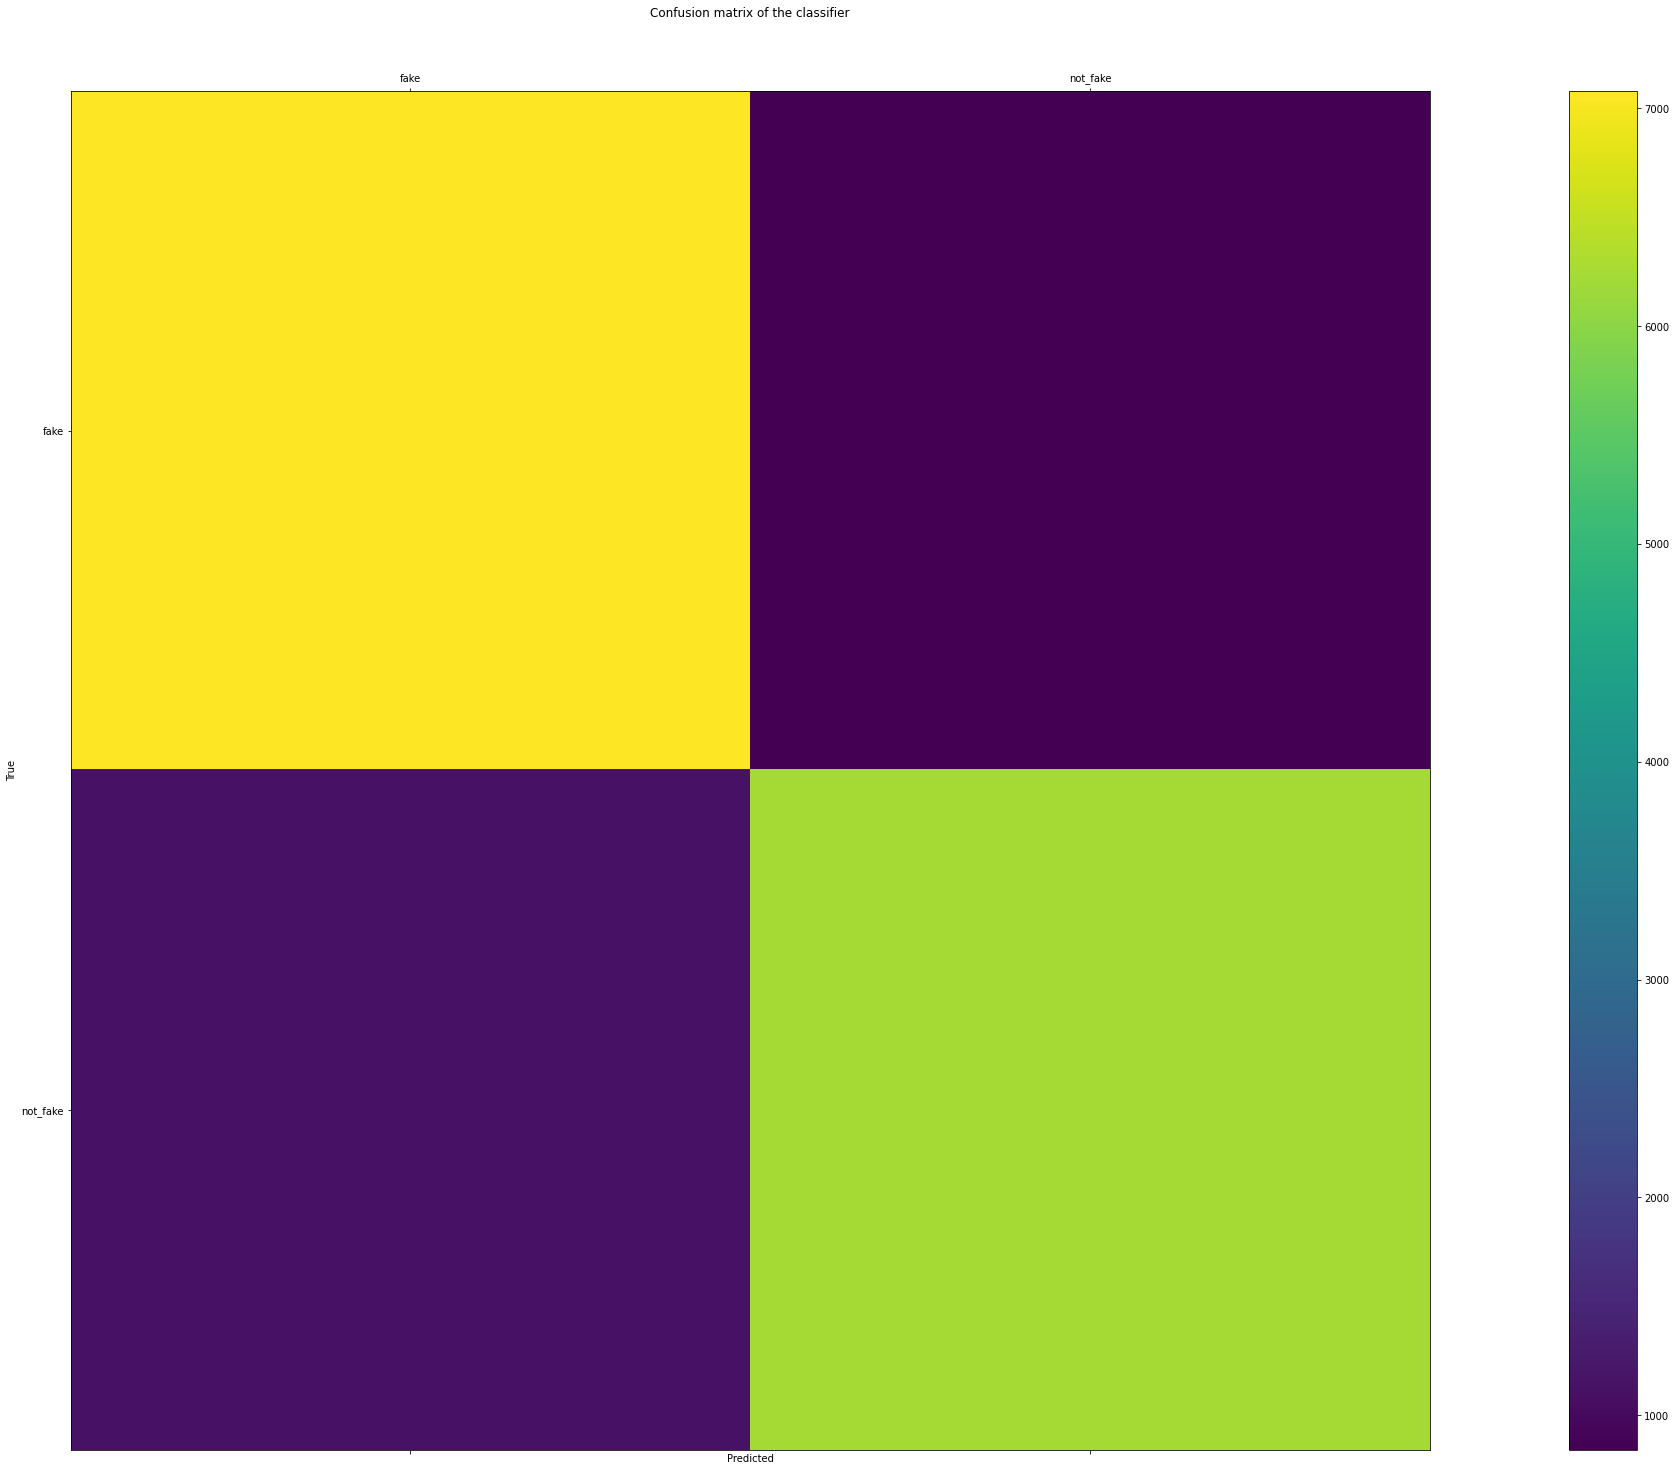

In [157]:
cm = confusion_matrix(y_test, prediction,labels=[0,1])
labels=['fake','not_fake']
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while anything off the diagonal was mislabeled by the classifier. Therefore, the higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

In [158]:
from sklearn.metrics import roc_auc_score, roc_curve

AUC - Test Set: 86.96%


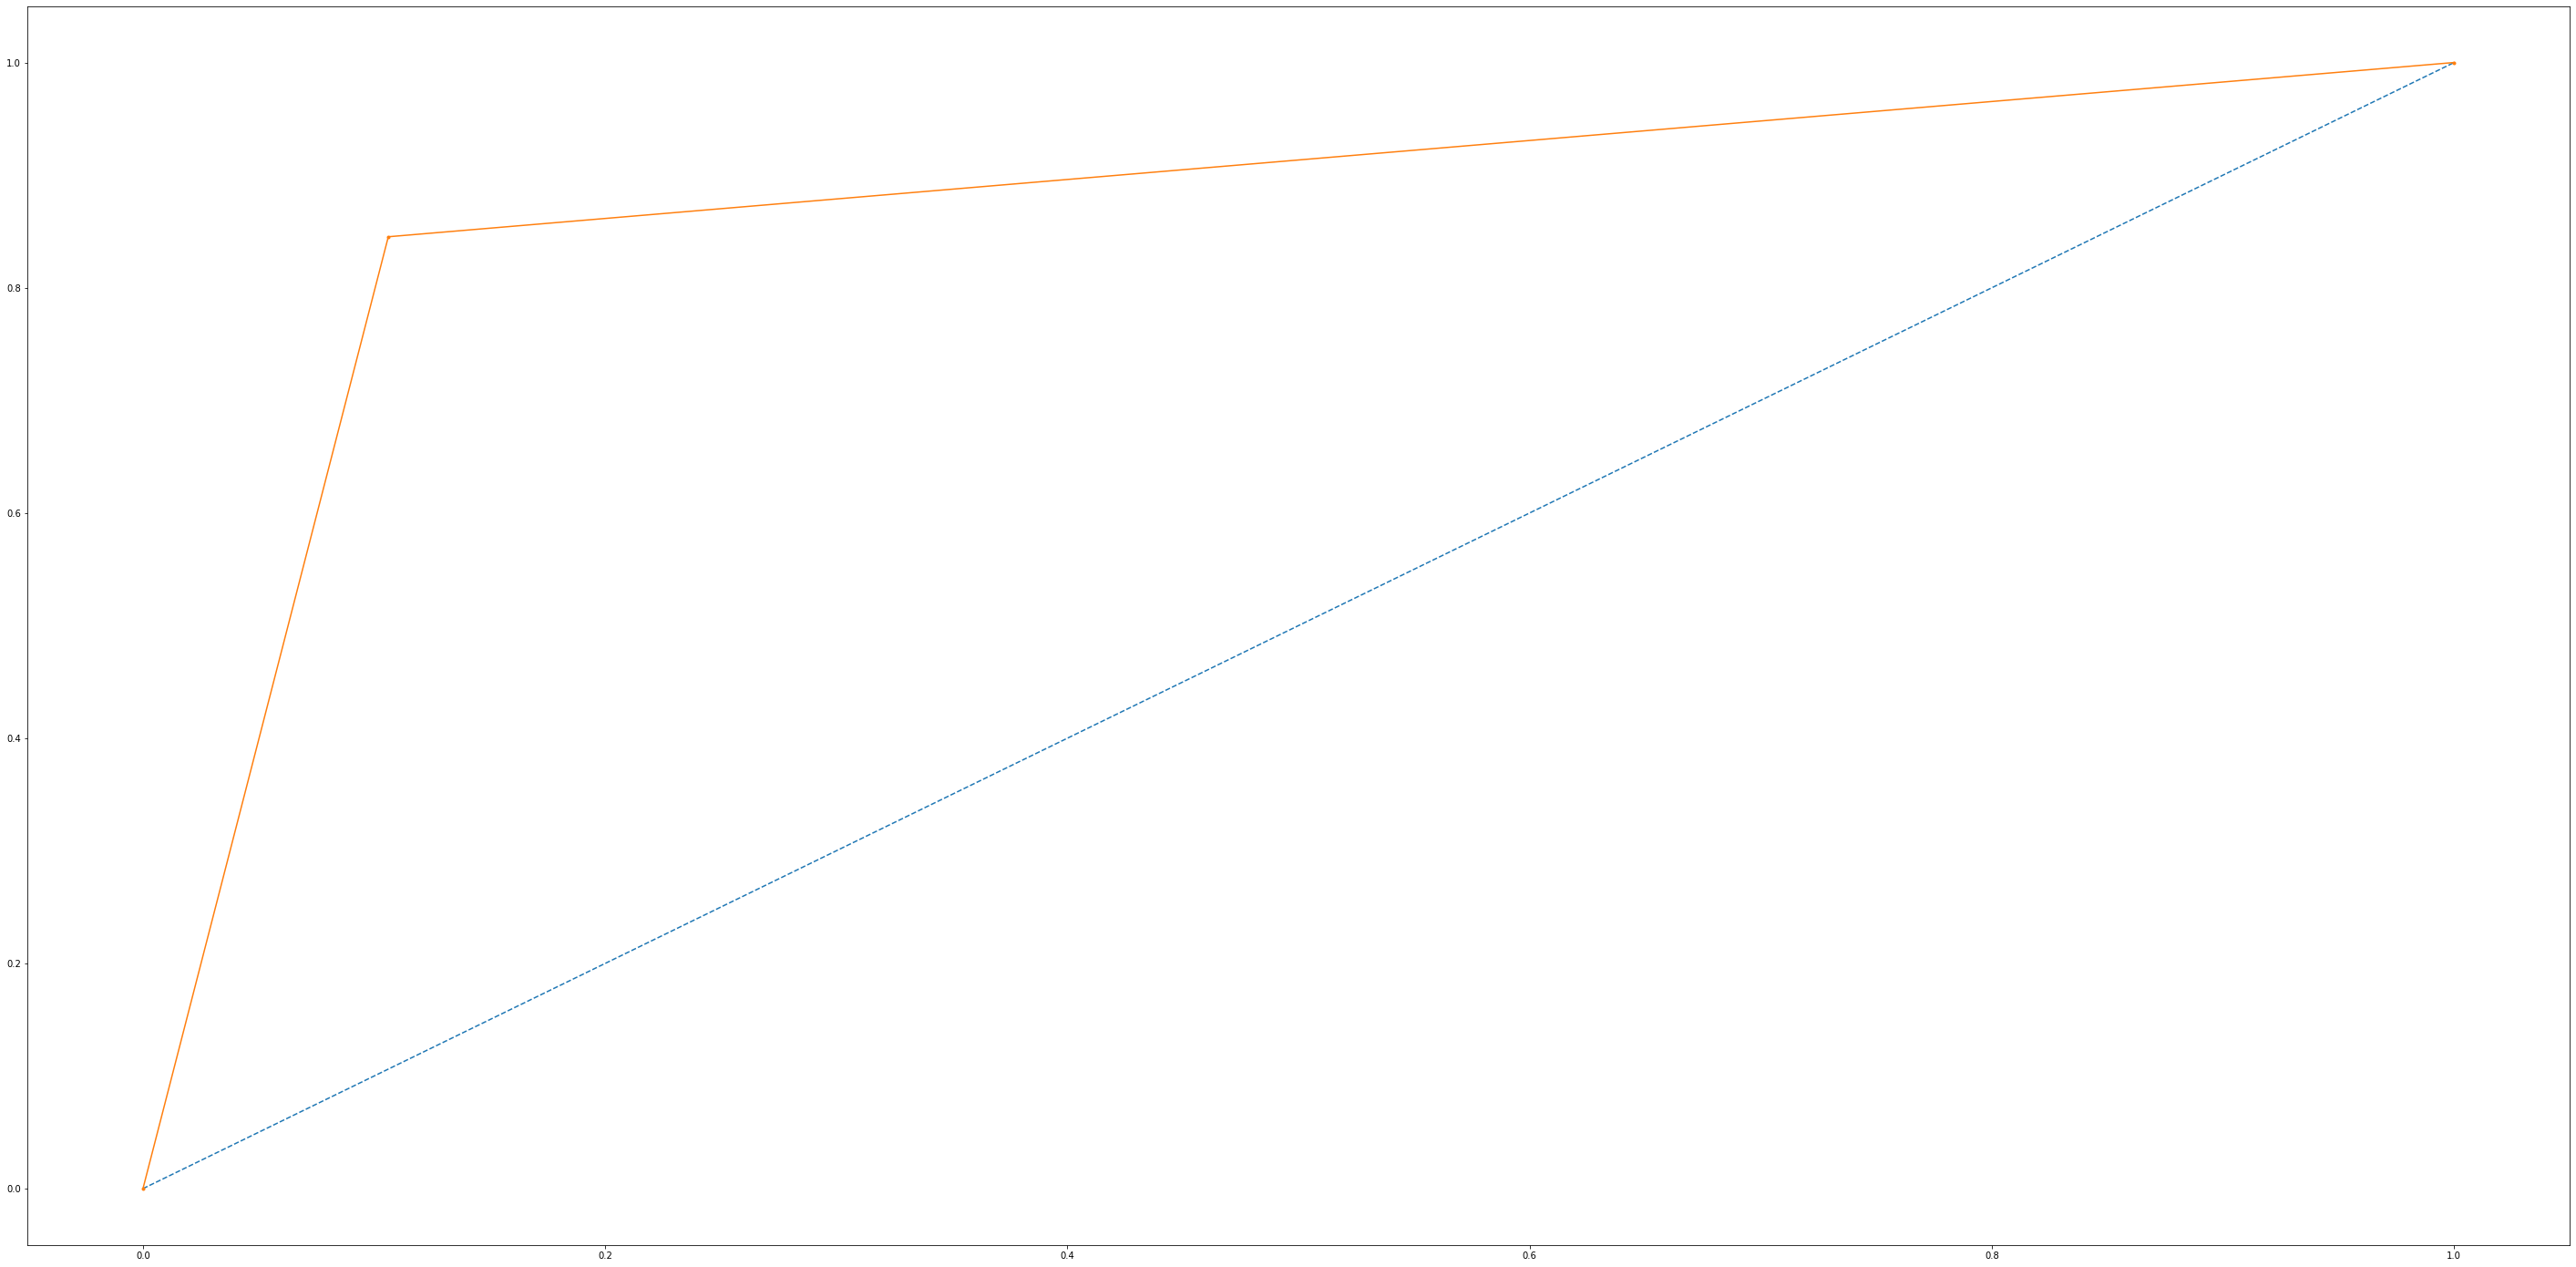

In [159]:
auc = roc_auc_score(y_test, prediction)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In the example above, the AUC is relatively close to 1 and greater than 0.5. A perfect classifier will have the ROC curve go along the Y axis and then along the X axis.

In [160]:
from sklearn import metrics

In [161]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7922
           1       0.88      0.85      0.86      7374

    accuracy                           0.87     15296
   macro avg       0.87      0.87      0.87     15296
weighted avg       0.87      0.87      0.87     15296



1)Precision — What percent of your predictions were correct?
2)Recall — What percent of the positive cases did you catch?
3)F1 score — What percent of positive predictions were correct?
4)Support
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.



# Model Evaluation for decision tree

In [ ]:
#####DecisionTreeClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])
DecisionTreemodel = pipe.fit(x_train, y_train)
prediction = DecisionTreemodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
DecisionTreemodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
cm = confusion_matrix(y_test, prediction,labels=[0,1])
labels=['fake','not_fake']
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, prediction)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
print(metrics.classification_report(y_test, prediction))

# Random Forest

In [73]:
#####RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=20))])

RandomForestmodel = pipe.fit(x_train, y_train) 
prediction = RandomForestmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
RandomForestmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 80.89%


# Model Evalution For Random Forest

[[6842 1080]
 [1843 5531]]


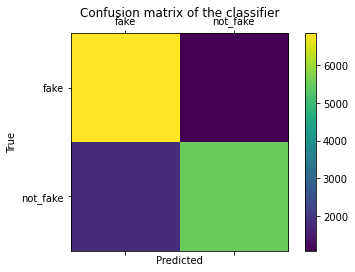

In [74]:
cm = confusion_matrix(y_test, prediction,labels=[0,1])
labels=['fake','not_fake']
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC - Test Set: 80.69%


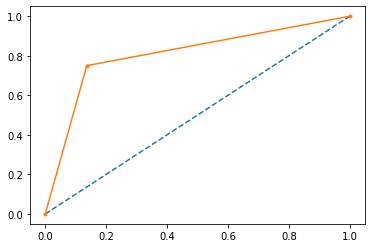

In [75]:
auc = roc_auc_score(y_test, prediction)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [76]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      7922
           1       0.84      0.75      0.79      7374

    accuracy                           0.81     15296
   macro avg       0.81      0.81      0.81     15296
weighted avg       0.81      0.81      0.81     15296



# Stochastic Gradient Descent

In [77]:
#Stochastic Gradient Descent
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])
SGDmodel = pipe.fit(x_train, y_train)
prediction = SGDmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
SDGmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 86.25%


# Model Evaluation For Gradient Descent

In [ ]:
cm = confusion_matrix(y_test, prediction,labels=[0,1])
labels=['fake','not_fake']
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, prediction)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
print(metrics.classification_report(y_test, prediction))

# GradientBoostingClassifier

In [ ]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

GBCmodel = pipe.fit(x_train, y_train)
prediction = GBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
GBCmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

# Model Evaluation for Gradient Boosting

[[7839   83]
 [2868 4506]]


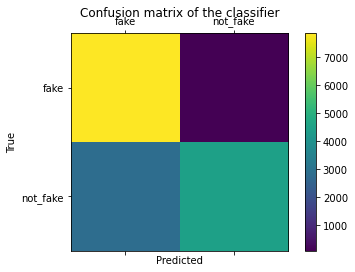

In [82]:
cm = confusion_matrix(y_test, prediction,labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, prediction)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
print(metrics.classification_report(y_test, prediction))

# XGboost

In [ ]:
#########XGBClassifier
from xgboost import XGBClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

xgboostmodel = pipe.fit(x_train, y_train)
prediction = xgboostmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
xgboostmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

# Model Evaluation For XGboost

In [ ]:
cm = confusion_matrix(y_test, prediction,labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC - Test Set: 80.09%


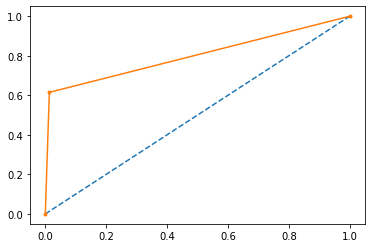

In [87]:
auc = roc_auc_score(y_test, prediction)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
print(metrics.classification_report(y_test, prediction))

# Multinomail Naive Bayes Classifier

In [ ]:
#######Multinomial Naive Bayes Classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

MNBCmodel = pipe.fit(x_train, y_train)
prediction = MNBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Multinomial_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

# Model Evaluation Of  Multinomail Naive Bayes Classifier

In [ ]:
cm = confusion_matrix(y_test, prediction,labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC - Test Set: 78.44%


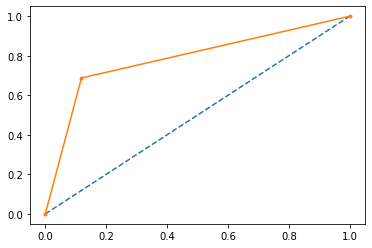

In [91]:
auc = roc_auc_score(y_test, prediction)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
print(metrics.classification_report(y_test, prediction))

# Bernoulli Naive Bayes Classifier

In [ ]:
#############Bernoulli Naive Bayes Classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

BNBCmodel = pipe.fit(x_train, y_train)
prediction = BNBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Bernoulli_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

# Model Evaluation Bernoulli Naive Bayes Classifier

In [ ]:
cm = confusion_matrix(y_test, prediction,labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, prediction)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
print(metrics.classification_report(y_test, prediction))

# Plot of all the Models Accucarcy 

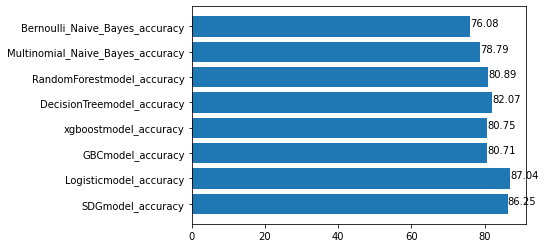

In [97]:
x = ["SDGmodel_accuracy", "Logisticmodel_accuracy", "GBCmodel_accuracy", "xgboostmodel_accuracy" , 
     "DecisionTreemodel_accuracy","RandomForestmodel_accuracy","Multinomial_Naive_Bayes_accuracy",
     "Bernoulli_Naive_Bayes_accuracy"]
y =  [SDGmodel_accuracy,Logisticmodel_accuracy,GBCmodel_accuracy,xgboostmodel_accuracy,
      DecisionTreemodel_accuracy,RandomForestmodel_accuracy,Multinomial_Naive_Bayes_accuracy,
      Bernoulli_Naive_Bayes_accuracy]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,25)

In [ ]:
plt.plot(x,y)

In [ ]:
import joblib  
# Save the model as a pickle in a file 
joblib.dump(Logisticmodel, 'Model deployment using Flask/model.pkl')  

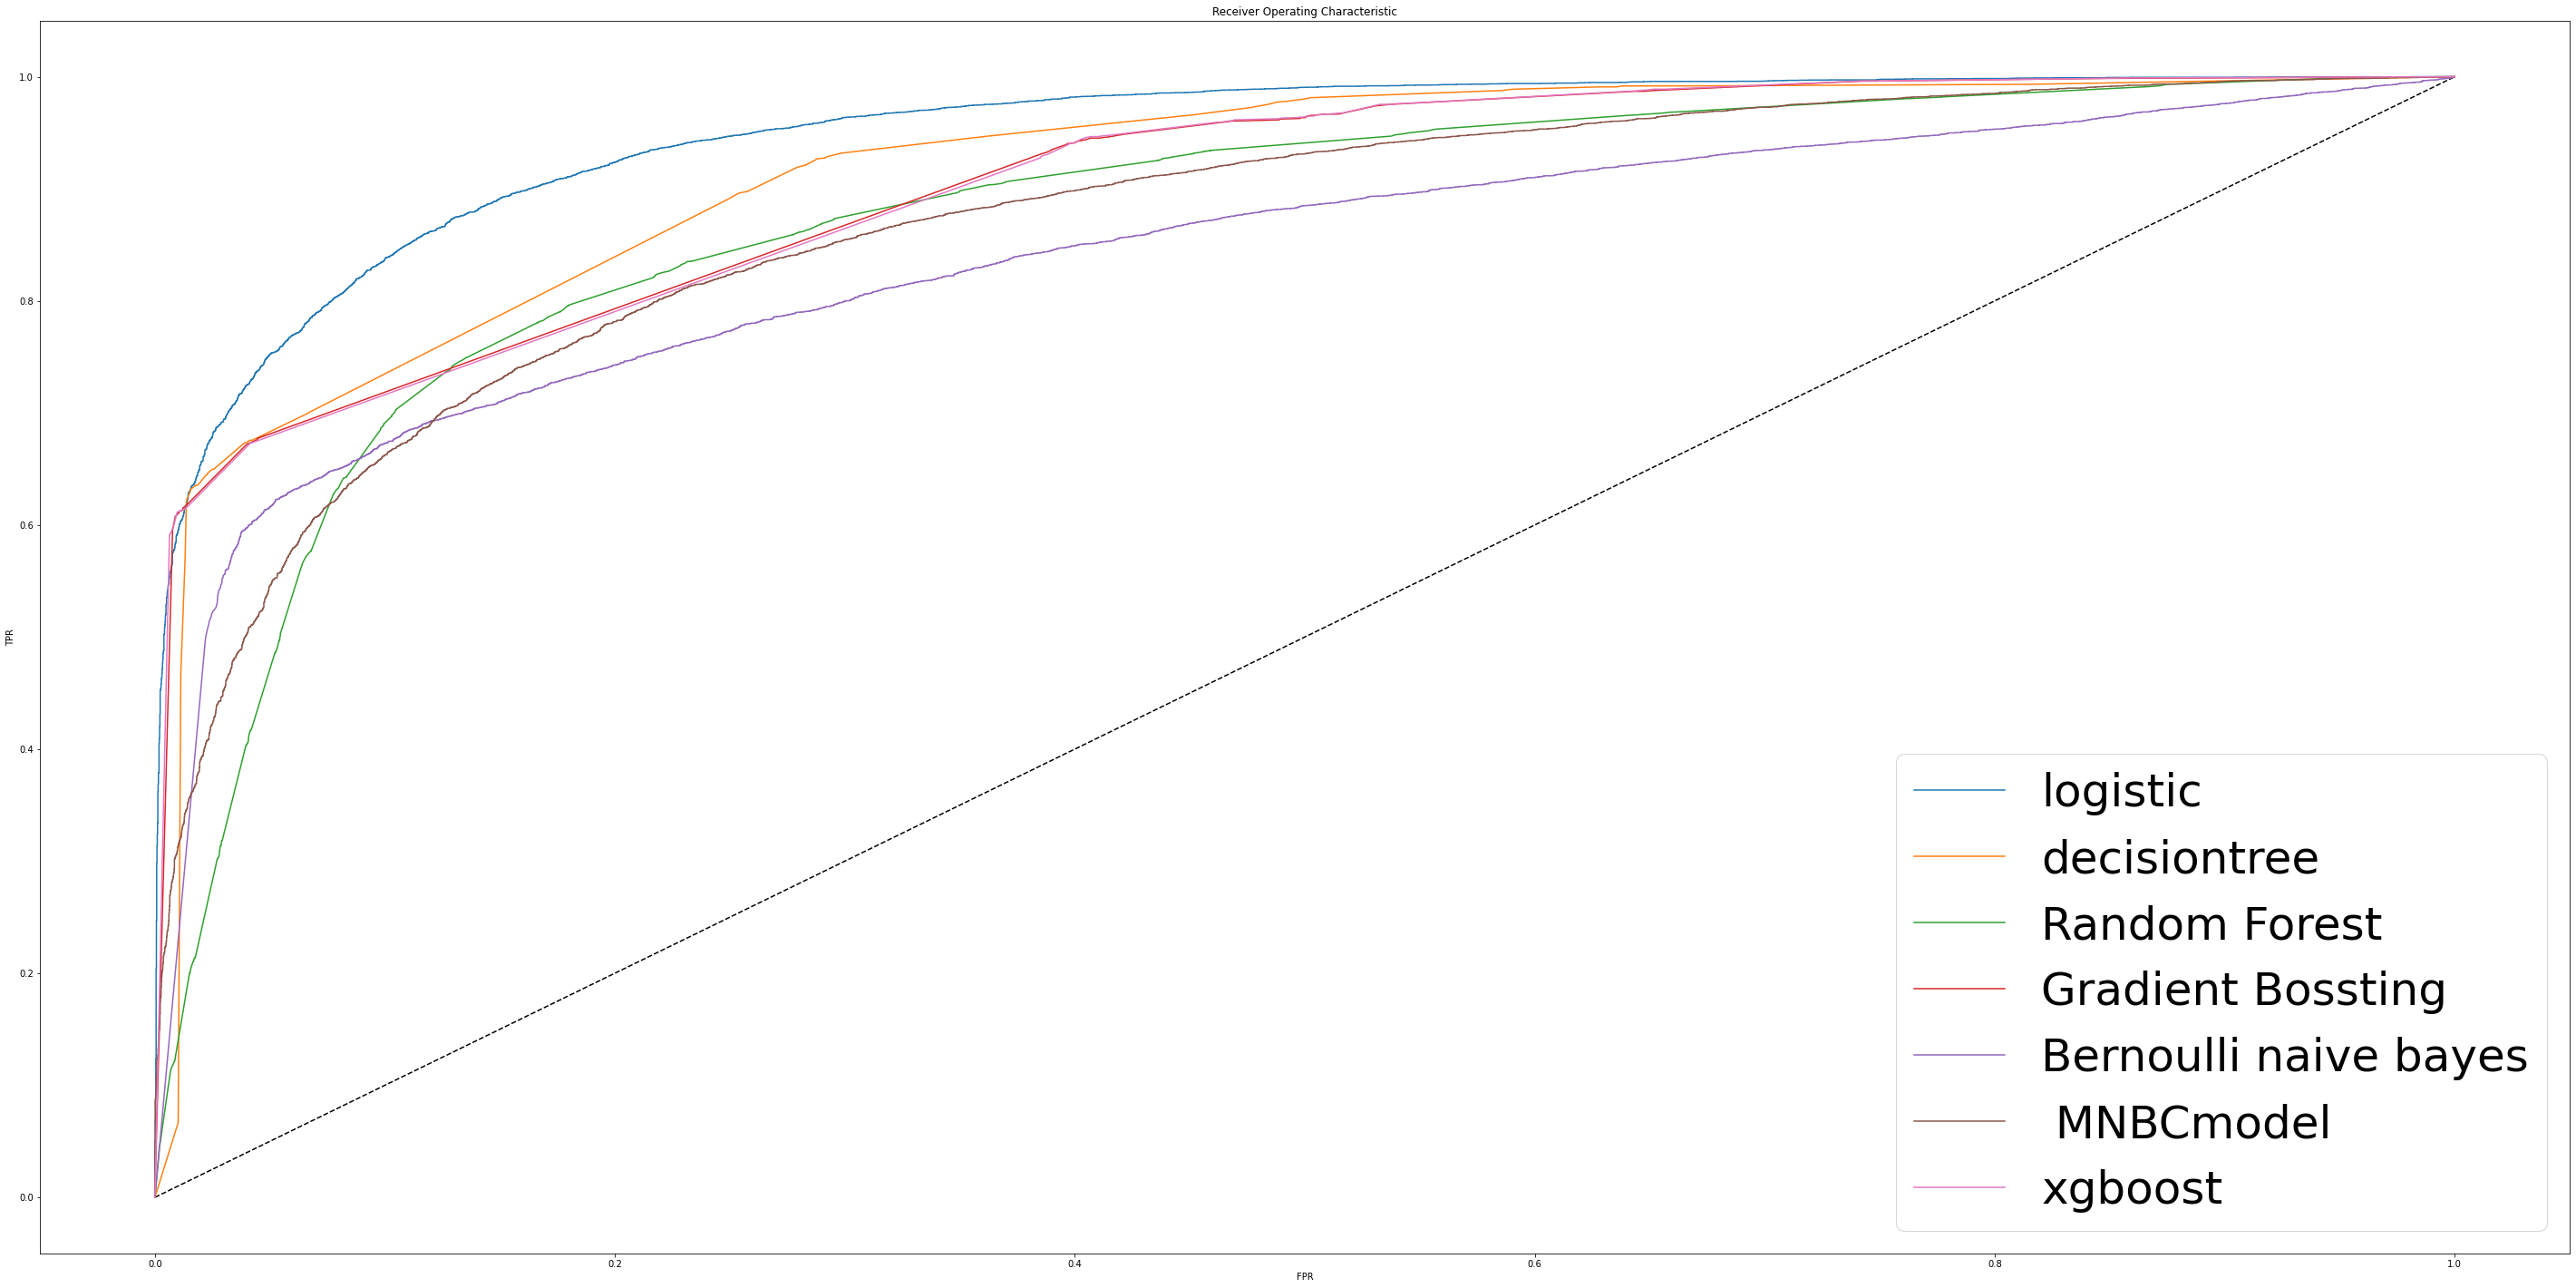

<Figure size 3600x3600 with 0 Axes>

In [166]:
from sklearn.metrics import roc_curve
y_pred_prob1 = Logisticmodel .predict_proba(x_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = DecisionTreemodel.predict_proba(x_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = RandomForestmodel.predict_proba(x_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

# y_pred_prob4 = SGDmodel.predict_proba(x_test)[:,1]
# fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 =GBCmodel.predict_proba(x_test)[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)

from sklearn.metrics import roc_curve
y_pred_prob6 = BNBCmodel .predict_proba(x_test)[:,1]
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)

y_pred_prob7 =  MNBCmodel.predict_proba(x_test)[:,1]
fpr7 , tpr7, thresholds7 = roc_curve(y_test, y_pred_prob7)




# y_pred_prob9 = SGDmodel.predict_proba(x_test)[:,1]
# fpr9 , tpr9, thresholds9 = roc_curve(y_test, y_pred_prob9)

y_pred_prob10 =xgboostmodel.predict_proba(x_test)[:,1]
fpr10 , tpr10, thresholds10 = roc_curve(y_test, y_pred_prob10)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "logistic")
plt.plot(fpr2, tpr2, label= "decisiontree")
plt.plot(fpr3, tpr3, label= "Random Forest")
#plt.plot(fpr4, tpr4, label= "Sigmoid")
plt.plot(fpr5, tpr5, label= "Gradient Bossting")
plt.plot(fpr6, tpr6, label= "Bernoulli naive bayes")
plt.plot(fpr7, tpr7, label= " MNBCmodel")
plt.plot(fpr10, tpr10, label= "xgboost")
plt.legend(loc='best', prop={'size': 50})
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()


plt.figure(figsize=(50, 50))

fig.savefig('Evalutaion_Curve.png')

In [168]:
import joblib

In [ ]:
Model=joblib.load('/content/sample_data/model.pk1')

In [ ]:
Model.predict(['President Trump relected'])

In [ ]:
import joblib
Model=joblib.load('/content/sample_data/model.pk1')
Model.predict(['New York Man Wanted For Infecting 240 Men And Women With HIV!!!'])

In [ ]:
Model.predict(['Barack Obama Tweets SICK Attack On John McCain, Says He Should Have Died'])

In [ ]:
Model.predict(['Trump Votes for Death Penalty For Being Gay'])

In [ ]:
Model.predict(['New York Man Wanted For Infecting 240 Men And Women With HIV!!!'])

In [ ]:
Model.predict(['Hillary Clinton says guns exceed next nine categories as leading cause of death for young black men'])

In [ ]:
Model.predict(['Hillary Clinton says guns exceed next nine categories as leading cause of death for young black men'])

In [ ]:
Model.predict(['India becomes the world’s greatest exporter of rice.'])

In [ ]:
Model.predict(['Saudi Arabia to Behead 6 School Girls for Being With Their Male Friends Without Parents or a Guardian'])

In [ ]:
Model.predict(['Carnival Cruise Lines will now offer FREE Cruises'])